# Part 1. Preliminary Study
-------------------------------------------------------------------------------------------------------------------

## Introduction

<ul>
    <li>Since Zopa firstly launched the innovative Peer-to-Peer(P2P) lending business in 2005, global P2P finance market has been steadily expanding with the growth of fintech startups. According to PRNewswire, its market is valued at approximately £12 billion in 2018.</li>
    <li>P2P lending has evolved as a disruptor in consumer finance in recent years. The UK, USA, Europe and China are the major markets for the industry.</li>
    <li>The major companies in the market include Zopa, Funding Circle, LendingTree, Lendingclub, onDeck Capital, Prosper Marketplace, Upstart, etc. Major companies are developing and actively adopting state-of-the-art technologies.</li>
    <li>In particular, they endeavour to keep their interest rate lower to gain competitive edge through credit risk management that should be undertaken.</li>
    <li>The critical risk factor with regard to P2P lending is that P2P companies are not compelled to make any payments to the investor in case of bad loans. Some players offer provision funds that is the allowance for bad debts but it reaches only up to their expected rate for bad ones.</li>  
    <li>Therefore, it is crucial to predict default risk as the P2P issues rather unsecured credit loans via Internet without conventional financial intermediaries.</li>
    <li>In this vein, the main purpose of this experiment is building the 'optimised model for loan default prediction' using various machine learning techniques.</li>
    <li>Furthermore, this experiment encompasses which factors significantly influence on bad loans as a consequence. Using common knowledge on financial industry, borrowers' credit grade, DTI(Debt-to-Income) ratio, income, ammount of fund could be strongly associated with loan default either negatively or positively. Emekter et al(2015) proposed borrowers' default determinants include credit grade, FICO score, debt-to-income ratio and revolving credit utilisation. The determinants can be varying in issuing companies' customer segment, product characteristics and external environmental influences, etc.</li>
    <li>Concisely, this experiment will investigate the optimised model for loan default prediction through:<Br> 
        - Deciding which factors are most important for this experiment<Br>
        - Training models to evaluate using different machine learning techniques<Br>
        - Selecting the best model based on the performance of prediction</li>   
    <li>For the chosen topic, LendingClub's dataset is explored and harnessed as its easily accessible, open historical transaction datasets on the Internet at https://www.kaggle.com/wendykan/lending-club-loan-data.
    <li>LendingClub is the world's largest peer-to-peer lending platform.</li>
    <li>The annual default rate across all grades at LendingClub is represented at 7.09 percent from Q1 2015 through Q1 2019 by Investopia, which is a US-based investment advisory company. (at: https://www.investopedia.com/lendingclub-review-4585233)</li>
    <li>For resolving the business problem, the experiment adopts an incremental approach that commences preliminary review to gain understanding of LendingClub's business as well as dataset, and to perform a mini-experiment by building simple models to set direction for the main experiment, followed by the structured main experiment.</li>    
</ul>

## Initial Experimental Development

### 1) Data Exploration

In [1]:
# Import relevant packages and read loan transation data from a csv file
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Draw a graph in Jupyter Notebook
%matplotlib inline

loans = pd.read_csv("./dataset/loan.csv")

In [2]:
loans.shape

(887379, 74)

[Interpretation]
74 fields and 887,379 records. High dimensionality as well as enough quantity of dataset to learn<Br>
Later on, only 1,000 rows will be randomly selected for the mini experiment.

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

[Interpretation]
51 fields are numerical values but 23 fields are non-numerical ones. Some columns such as annual_inc_joint, dti_joint and verification_status_joint have NaN more than half. This will be analysed in detail later.

In [4]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [5]:
loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loans.shape

(887379, 74)

### 2) Preprocessing Samples

In [7]:
# Select a target variable and hypothetical features that are assumed to be important to predict default
# 6 features have been chosen through domain knowledge and article review of 
# "Determinants of Borrowers’ Default in P2P Lending under Consideration of the Loan Risk Class" 
#  (Michal Polena and Tobias Regner, 2018) 
loans = loans[ : 3000] # 3,000 rows of sample data (without missing data)
loans = loans[['loan_status', 'loan_amnt', 'int_rate', 'grade', 'annual_inc', 'dti', 'revol_util']]
loans

,loan_status,loan_amnt,int_rate,grade,annual_inc,dti,revol_util
0,Fully Paid,5000.0,10.65,B,24000.0,27.65,83.7
1,Charged Off,2500.0,15.27,C,30000.0,1.00,9.4
2,Fully Paid,2400.0,15.96,C,12252.0,8.72,98.5
3,Fully Paid,10000.0,13.49,C,49200.0,20.00,21.0
4,Current,3000.0,12.69,B,80000.0,17.94,53.9
...,...,...,...,...,...,...,...
2995,Fully Paid,30000.0,6.62,A,89028.0,18.65,19.4
2996,Fully Paid,5000.0,12.42,B,22000.0,7.58,91.4
2997,Fully Paid,7500.0,16.77,D,120000.0,12.84,98.0
2998,Fully Paid,35000.0,12.42,B,64620.0,10.05,53.2


[Interpretation]
Target variable <b>'loan_status'</b> and feature <b>'grade'</b> are non-numerical, categoriacl data and thus both need to be encoded</u><Br>
The following below demonstrates the process of enconding for 'loan_status' and 'grade', step by step.

In [8]:
# Encode loan_status
# Select distinct values of loan_status
list(loans['loan_status'].unique())

['Fully Paid',
 'Charged Off',
 'Current',
 'Default',
 'Late (31-120 days)',
 'In Grace Period',
 'Late (16-30 days)']

[Interpretation]
There are ten labels of loan status as follows:<Br>
    <ul>
        <li>'Fully Paid': Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.</li>
         <li>'Charged Off": Loan for which there is no longer a reasonable expectation of further payments. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance</li>
        <li>'Current': Loan is up to date on all outstanding payments. </li>
        <li>'Default': Loans for which borrowers have failed to make payments for an extended period of time.</li>
        <li>'Late (31-120 days)': Loan has not been current for 31 to 120 days. </li>
        <li>'In Grace Period': Loan is past due but within the 15-day grace period. </li>
        <li>'Late (16-30 days)': Loan has not been current for 16 to 30 days.</li>
        <li>'Does not meet the credit policy. Status:Fully Paid': Not clearly stated.</li>
        <li>'Does not meet the credit policy. Status:Charged Off': Not clearly stated.</li>
        <li>'Issued': New loan that has passed all LendingClub reviews, received full funding, and has been issued.</li>
    </ul>
    (Source: https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-)

In [9]:
# Create a default loan label feature
# Among ten labels of loan status, only two indicators, 'default' and 'charged Off' , are regarded as default.
# Actually, 'charged Off' is different from 'default' legally.
# However, for the investor and P2P companies there is no different consequences ot the two.
# Target variable 'default_loan' {'Default': 1, 'Non-default': 0}
loans['default_loan'] = np.where((loans.loan_status == 'Charged Off') | 
                                 (loans.loan_status == 'Default'), 1, 0)
print(loans['default_loan'])
# Drop an old column encoded
loans.drop(['loan_status'], axis = 1, inplace = True)

0       0
1       1
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: default_loan, Length: 3000, dtype: int32


In [10]:
# Hot encode grade variable (categorical feature)
# Select distinct values of grade
sorted(list(loans['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']

[Interpretation]
There are seven categories of grade based on risk from A to G.<Br>
The higher the grade, the lower the risk and the lower the borrower’s interest rate.<Br> 
An 'A' loan has an interest rate as low as 6.16 percent, while a 'G' loan has an interest rate as high as 35.89 percent.

In [11]:
# Hot encode grade variable (categorical feature)
grade_hot = pd.get_dummies(loans['grade'])
print(grade_hot)
loans_coded = pd.concat([loans, grade_hot], axis = 1).drop('grade', axis = 1)
loans_coded.shape

      A  B  C  D  E  F  G
0     0  1  0  0  0  0  0
1     0  0  1  0  0  0  0
2     0  0  1  0  0  0  0
3     0  0  1  0  0  0  0
4     0  1  0  0  0  0  0
...  .. .. .. .. .. .. ..
2995  1  0  0  0  0  0  0
2996  0  1  0  0  0  0  0
2997  0  0  0  1  0  0  0
2998  0  1  0  0  0  0  0
2999  1  0  0  0  0  0  0

[3000 rows x 7 columns]


(3000, 13)

[Interpretation]
Finally, mini dataset has been prepared to train models with thirteen features.<Br>
Seven columns newly added from A to G along with deleting tow encoded columns, a grade and a loan_status.

In [12]:
# Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split

y = loans_coded['default_loan']
X = loans_coded.drop('default_loan', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [13]:
X_train.head(3)

,loan_amnt,int_rate,annual_inc,dti,revol_util,A,B,C,D,E,F,G
499,18500.0,10.65,40000.0,26.34,0.1,0,1,0,0,0,0,0
2457,3125.0,21.67,9960.0,13.01,97.0,0,0,0,0,0,1,0
2729,20000.0,12.69,64049.0,19.30,69.4,0,1,0,0,0,0,0


In [14]:
# Feature scaling through standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # mean : 0, standard deviation : 1
sc.fit(X_train) # fit only a train dataset
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # Do not fit a test dataset

# Transform ndarray into dataframe to check the result scaled.
X_train_std_ = pd.DataFrame(data = X_train_std, columns = X_train.columns)
X_train_std_.head()

X_train = X_train_std
X_test = X_test_std

In [15]:
# Check the mean and variance values scaled.
print(X_train_std_.mean())
print('-'*50)
print(X_train_std_.var())

loan_amnt     1.237106e-16
int_rate      8.437695e-17
annual_inc    3.452182e-17
dti          -8.289665e-17
revol_util   -3.489272e-16
A            -9.785823e-17
B            -1.779529e-16
C             1.583918e-16
D             9.537344e-17
E            -2.687268e-16
F            -1.231555e-16
G             3.189512e-16
dtype: float64
--------------------------------------------------
loan_amnt     1.000476
int_rate      1.000476
annual_inc    1.000476
dti           1.000476
revol_util    1.000476
A             1.000476
B             1.000476
C             1.000476
D             1.000476
E             1.000476
F             1.000476
G             1.000476
dtype: float64


[Interpretation]
Input values are well standardised using StandardScaler class.<br>
Mean values of each feature is near zero and its variance values converges one. (mean = 0, variance = 1)

### 3) Test Model Building and Evaluation

In [16]:
# 1. "Perceptron" as an example of Parametric Machine Learning Algorithms
from sklearn.linear_model import Perceptron
from sklearn import linear_model
# Probability calibration with isotonic regression or sigmoid
# In order to calculate probabilities to draw a ROC courve
from sklearn.calibration import CalibratedClassifierCV

# Build a Peceptron classifier
# Probability calibration with isotonic regression or sigmoid
# In order to calculate probabilities to draw a ROC courve
pceptron = linear_model.Perceptron()
pceptron.fit(X_train, y_train)
pc_prediction = pceptron.predict(X_test)
pc_isotonic = CalibratedClassifierCV(pceptron, cv = 10, method = 'isotonic')
pc_isotonic.fit(X_train, y_train)
# Calculate probabilities to draw a ROC curve (Receiver Operating Characteristic Curve)
pc_probas = pc_isotonic.predict_proba(X_test)

In [17]:
# 2. "Decision Tree" as an example of Nonparametric Machine Learning Algorithms

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dt_prediction = dtree.predict(X_test)
# Calculate probabilities to draw a ROC curve (Receiver Operating Characteristic Curve)
dt_probas = dtree.predict_proba(X_test)

----------------- Perception Performance -------------------
[[653  94]
 [127  26]]


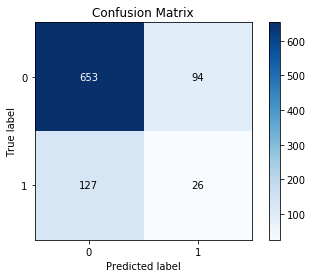

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       747
           1       0.22      0.17      0.19       153

    accuracy                           0.75       900
   macro avg       0.53      0.52      0.52       900
weighted avg       0.73      0.75      0.74       900



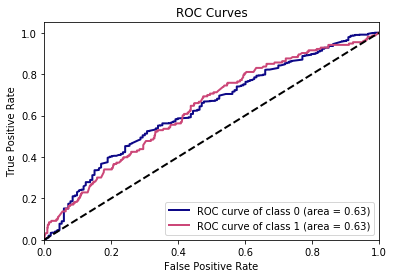



----------------- Decision Tree Performance -----------------
[[612 135]
 [117  36]]


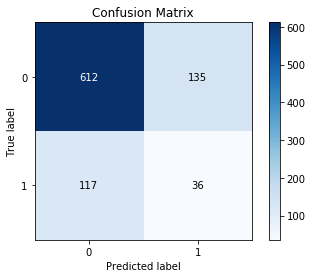

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       747
           1       0.21      0.24      0.22       153

    accuracy                           0.72       900
   macro avg       0.53      0.53      0.53       900
weighted avg       0.73      0.72      0.73       900



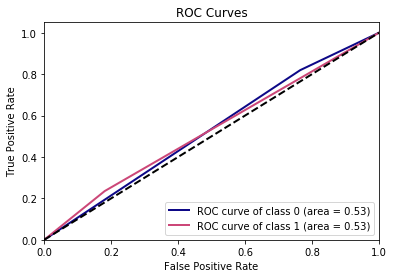

In [18]:
# Check performance of the model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Install scikit-plot package: https://anaconda.org/conda-forge/scikit-plot
# win-32/64 v0.3.5: conda install -c conda-forge scikit-plot
import scikitplot as skplt 

print("----------------- Perception Performance -------------------")
print(confusion_matrix(y_test, pc_prediction))
skplt.metrics.plot_confusion_matrix(y_test, pc_prediction)
plt.show()
print(classification_report(y_test, pc_prediction))
# Draw the ROC curve of perceptron classifier
skplt.metrics.plot_roc(y_test, pc_probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()

print("\n\n----------------- Decision Tree Performance -----------------")
print(confusion_matrix(y_test, dt_prediction))
skplt.metrics.plot_confusion_matrix(y_test, dt_prediction)
plt.show()
print(classification_report(y_test, dt_prediction))
# Draw the ROC curve of decision tree classifier
skplt.metrics.plot_roc(y_test, dt_probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()

[Interpretation]
<ul>
    <li>Target variable 'default_loan' = {'Default': 1, 'Normal(Non-default)': 0}</li>
    <li>Perceptron: Accuracy is 63 percent but the sensitivity of default(1) shows just 44 percent</li>
    <li>In addition, the ROC curve illustrates bad learing with the AUC of 0.59.</li>
    <li>Decision Tree: Accuracy is 74 percent but the sensitivity of default(1) shows just 24 percent</li>
    <li>The its ROC curve also demonstrates bad learing with the AUC of 0.54.</li>  
</ul>

### 4) Implications

In [19]:
# Check data imbalance
print(loans_coded['default_loan'].value_counts())
print('-'*50)
print(loans_coded['default_loan'].value_counts(normalize = True))

# Call a garbage colloctor to free momory
import gc
gc.collect()

0    2503
1     497
Name: default_loan, dtype: int64
--------------------------------------------------
0    0.834333
1    0.165667
Name: default_loan, dtype: float64


0

Through a mini-experiment, we gained some implications as follows:
<ul>
    <li>Data imbalance may influence on each model's learning process.</li>
        - Shown above, the sample data comprise just around 17 percent among three thousand samples<br> 
          while tha normal status data comprise 83 percent among those.<br>
        - Simply, if the classifier predicts all targets merely as zero, the accuracy could be over 80 percent.<br>
        - On top of that, classifier models are prone to be very sensitive to missing data such as NaN.<br>
        - Therefore, it will be of significance to properly deal with data imbalance and missing data <br>during preprocessing in the next step.<br>
    <li>Also, sensitivity(recall rate) should be more focused on as a performance metric than accuracy or precision.</li>
        - If a model fails to predict default loan rather than normal, it could lead to fatal profit loss at LendingClub.<br>  
        - Concisely, in this business case, the recall of actual true positive is far more important than others.
</ul>